In the document entitled **a first glance**, I tried to re-discover some correlations between *doctor's office waiting time* and *race/ethnicity*. Although I didn't do any statistics (yet), it looked like there was a relationship between the variables. 

Today I'm going to see how race/ethnicity correlate to the `ACC_USHURRY` or `ACC_USEXPPRB` or `ACC_USDISCUS` variables, which represent "Doctor seems to be in a hurry," "Doctor doesn't explain medical problems," and "[Health problems should] be discussed but are not."

The values are encoded in this way:

     .='Missing'
     1='1:Strongly Agree'
     2='2:Agree'
     3='3:Disagree'
     4='4:Strongly Disagree'
     5='5:No experience'
    -7='-7:Refused'
    -8="-8:Don't know"
    -9='-9:Not ascertained'

In [1]:
from IPython.display import display_pretty
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

%matplotlib inline

In [40]:
mcbs_datafile = os.path.join(os.getcwd(), '..', 'data', 'ATCPUF13.csv')
df = pd.read_csv(mcbs_datafile)

# create race dict for conversion
racefmt = {1:'White',
           2:'Black',
           3:'Hispanic',
           4:'Other'}


race = df.IV_RACE.replace(racefmt)

# we only keep values 1-4 for the "agree" format
hurry = df.ACC_USHURRY
explain = df.ACC_USEXPPRB
discuss =df.ACC_USDISCUS

# construct access-to-care DataFrame
access_df = pd.DataFrame({'race': race,
                          'hurry': hurry,
                          'explain': explain,
                          'discuss': discuss})

In [41]:
# clean out all values where discuss/explain/hurry are not 1-4
access_df = access_df[((access_df.hurry <= 4) & (access_df.hurry >= 1)) &
                      ((access_df.explain <= 4) & (access_df.explain >= 1)) &
                      ((access_df.discuss <= 4) & (access_df.discuss >= 1))]

print(access_df.sample(10))

       discuss  explain  hurry      race
10894      4.0      4.0    4.0     White
6079       3.0      3.0    3.0     White
13178      4.0      3.0    3.0     Black
136        1.0      1.0    4.0  Hispanic
793        2.0      2.0    2.0     White
11767      4.0      4.0    4.0     White
10340      3.0      3.0    3.0  Hispanic
10224      3.0      3.0    3.0  Hispanic
4515       3.0      3.0    3.0     White
753        3.0      3.0    2.0     White


In [4]:
grouped_access = access_df.groupby('race')
grouped_access.aggregate(np.mean)

,discuss,explain,hurry
race,,,
Black,3.075277,3.069373,3.061993
Hispanic,3.075488,3.084369,3.043517
Other,3.073136,3.119550,3.016878
White,3.171677,3.173059,3.083502


Note: higher is better.

In [6]:
agree_fmt = {1: 'Strongly Agree',
             2: 'Agree',
             3: 'Disagree',
             4: 'Strongly Disagree'}

access_df.hurry.replace(agree_fmt, inplace=True)
access_df.explain.replace(agree_fmt, inplace=True)
access_df.discuss.replace(agree_fmt, inplace=True)

For plotting help, see http://stackoverflow.com/questions/31460146/plotting-value-counts-in-seaborn-barplot.

AttributeError: Unknown property normed

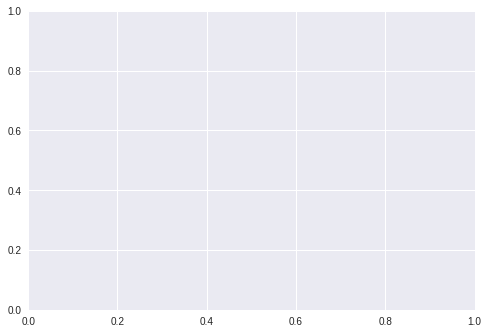

In [53]:
for cat in ['discuss', 'explain', 'hurry']:
    access_df.groupby(['race', cat]).size().unstack().plot.barh(stacked=True, normed=True)